<a href="https://colab.research.google.com/github/denis1krivtsov/AlgoritmStuctData/blob/master/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("keras")
library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Импорт и распределение по массивам обучение и тест

In [20]:
fashion_mnist <- dataset_fashion_mnist()

c(train_images, train_labels) %<-% fashion_mnist$train
c(test_images, test_labels) %<-% fashion_mnist$test

dim(train_images) #60000 изображений 28*28

[1] 60000    28    28

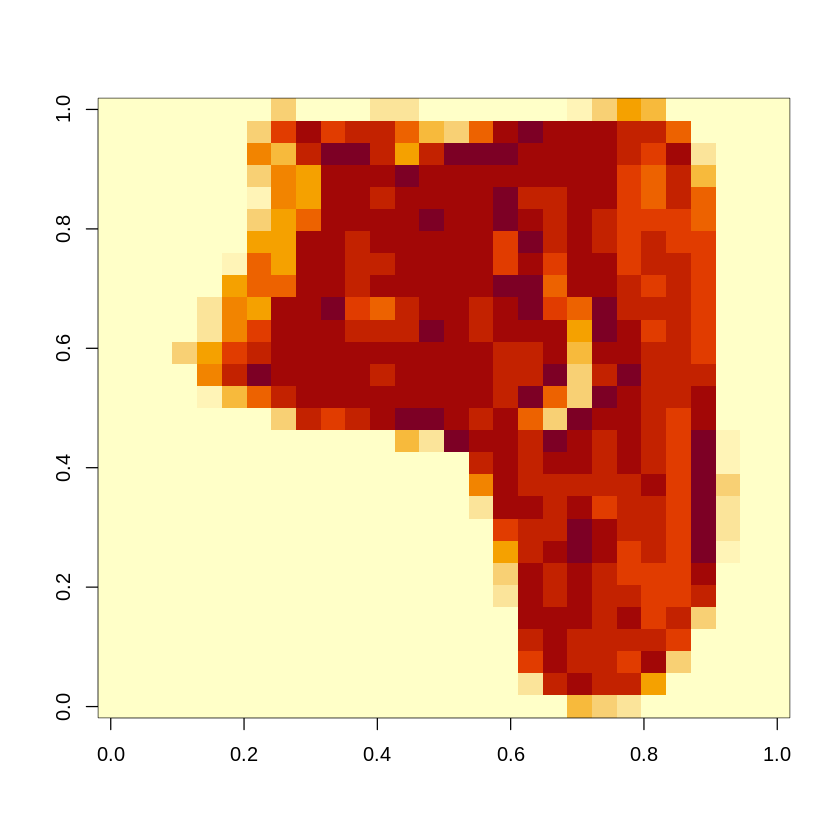

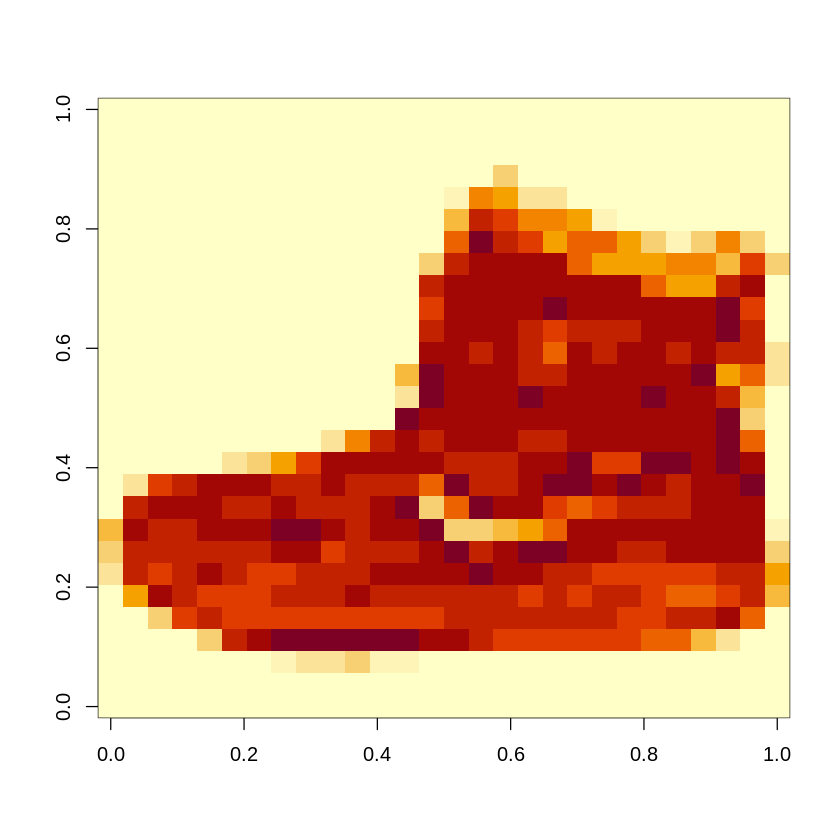

In [21]:
image(train_images[1,,]) # Бачимо, що картинка розвернута на бік

plotImage = function(im) {
  image(t(apply(im, 2, rev)))
}
plotImage(train_images[1,,])

#Мы масшт значения пикселей в диапазоне от 0 до 1
train_images = array_reshape(train_images, c(60000, 28, 28, 1))

train_images <- train_images / 255

test_images  = array_reshape(test_images, c(10000, 28, 28, 1))
test_images <- test_images / 255

Побудуємо спочатку щільну мережу


In [4]:
denseModel <- keras_model_sequential() %>%
  layer_flatten(input_shape = c(28, 28)) %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'softmax')

denseModel %>% compile(
  optimizer = 'adam', 
  loss = 'sparse_categorical_crossentropy',
  metrics = c('accuracy')
)

denseModel %>% fit(train_images, train_labels, epochs = 5, verbose = 2)
#оценка точности
score <- denseModel %>% evaluate(test_images, test_labels, verbose = 0)
score

loss accuracy 
0.349516 0.873800

Спробуємо покращити модель

In [6]:
denseModel <- keras_model_sequential() %>%
  layer_flatten(input_shape = c(28, 28)) %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'softmax')

denseModel %>% compile(
  optimizer = 'adam', 
  loss = 'sparse_categorical_crossentropy',
  metrics = c('accuracy')
)

denseModel %>% fit(train_images, train_labels, epochs = 10, verbose = 2)
#оценка точности
score <- denseModel %>% evaluate(test_images, test_labels, verbose = 0)
score

loss  accuracy 
0.3265315 0.8857000

Побудуємо тепер згорткову мережу

In [11]:
#Скроситаємось functional AP
inputs = layer_input(shape=c(28,28,1))
z = layer_conv_2d(inputs, filters=32, kernel_size=c(3,3), activation="selu")
z = layer_max_pooling_2d(z, pool_size = c(2, 2))
z = layer_conv_2d(z, filters = 64, kernel_size = c(3, 3), activation = "relu")
z = layer_max_pooling_2d(z, pool_size = c(2, 2))
z = layer_conv_2d(z, filters = 64, kernel_size = c(3, 3), activation = "relu")
outputs = z
model = keras_model(inputs, outputs)

In [13]:
## Додамо останній шар для класифікації
z = layer_flatten(z)
z = layer_dense(z, units = 64, activation = "selu")
outputs = layer_dense(z, units = 10, activation = "softmax")
model = keras_model(inputs, outputs)

denseModel %>% compile(
  optimizer = 'adam', 
  loss = 'sparse_categorical_crossentropy',
  metrics = c('accuracy')
)

denseModel %>% fit(train_images, train_labels, epochs = 10, batch_size=512, verbose = 2)
#оцінка точності
score <- denseModel %>% evaluate(test_images, test_labels)
score
#при увеличении batch_size растут и потери 

loss  accuracy 
0.6838201 0.8995000

In [9]:
model = keras_model_sequential() %>%
    layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = "selu", input_shape = c(28, 28, 1)) %>%
    layer_max_pooling_2d(pool_size = c(2, 2)) %>%
    layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu") %>%
    layer_max_pooling_2d(pool_size = c(2, 2)) %>%
    layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu") %>%
    layer_batch_normalization() %>%
    layer_dense(units = 128, activation = "selu") %>%
    layer_dense(units = 10, activation = "softmax")

denseModel %>% compile(
  optimizer = 'adam', 
  loss = 'sparse_categorical_crossentropy',
  metrics = c('accuracy')
)

denseModel %>% fit(train_images, train_labels, epochs = 10, batch_size=32)
#оцінка точності
score <- denseModel %>% evaluate(test_images, test_labels)
score

loss  accuracy 
0.4753913 0.8917000

In [28]:
predictions <- denseModel %>% predict(test_images)
predictions[1, ]

which.max(predictions[1, ])


[1] 1.135605e-18 6.477404e-16 1.175196e-14 1.998663e-22 4.779750e-15
 [6] 1.125903e-11 1.529738e-19 1.033063e-10 2.190527e-21 1.000000e+00

[1] 10